In [25]:
filename = "C:\\Training\\socgen_python_ml\\datasets\\height_weight\\weight-height.csv"
import pandas as pd
df = pd.read_csv(filename)

In [27]:
df.shape

(10000, 3)

how do we say a person is fat, average or underweight.

assumption in a normal distribution

![title](Standard_deviation_diagram.svg)

In [89]:
df['HeightWeightRatio'] = df['Weight'] / df['Height']

# #lets box it to two decimal places 
df = df.round({'HeightWeightRatio':2})
# #df.head()


# # we separate male and female 

dfmale = df.query("Gender == 'Male'")
dffemale = df.query("Gender == 'Female'")

dfmale.head()
#df.head()

Gender     Height      Weight  HeightWeightRatio
0   Male  73.847017  241.893563               3.28
1   Male  68.781904  162.310473               2.36
2   Male  74.110105  212.740856               2.87
3   Male  71.730978  220.042470               3.07
4   Male  69.881796  206.349801               2.95

In [90]:
dfmale.describe()

Height       Weight  HeightWeightRatio
count  5000.000000  5000.000000        5000.000000
mean     69.026346   187.020621           2.703814
std       2.863362    19.781155           0.198833
min      58.406905   112.902939           1.880000
25%      67.174679   173.887767           2.570000
50%      69.027709   187.033546           2.710000
75%      70.988744   200.357802           2.840000
max      78.998742   269.989699           3.420000

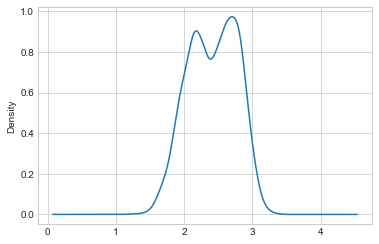

In [91]:
df['HeightWeightRatio'].plot.kde()

In [93]:
#lets plot this with seaborn
#https://seaborn.pydata.org/index.html
import seaborn as sns

C:\Users\sanya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


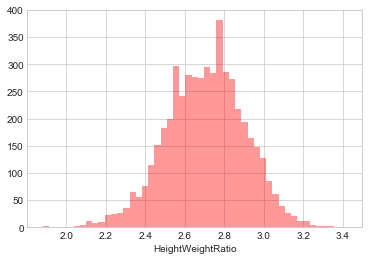

In [96]:
sns.set_style('whitegrid')
sns.distplot(dfmale['HeightWeightRatio'], kde = False, color ='red')

C:\Users\sanya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


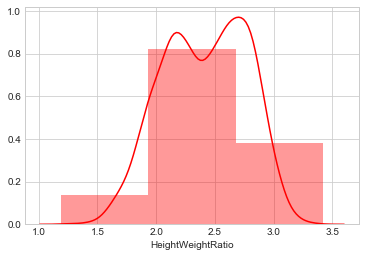

In [101]:
sns.distplot(dfmale['HeightWeightRatio'], kde = True, color ='red', bins = 3)

In [ ]:
#what happens when you plot for both male and female together?
#this is called a bimodal distrubution. So a standard deviation will not work. 

#so from this chart what should be the ideal heightweight ratio to be called overweight and underweight?


Back to dataframes

We have seen multiple data frame operations namely
1. selecting parts of dataframe df[['col1','col2']]
2. creating new columns in the dataframe df['newcol'] = somefunction
3. Performing operations of columns 
4. Joining two dataframes using merge


Now we will look into two operations
1. union
2. groupby


In [103]:
animals = pd.DataFrame({
    "kind": ["cat", "dog", "cat", "dog"],
    "height": [9.1, 6.0, 9.5, 34.0],
    "weight": [7.9, 7.5, 9.9, 198.0]
})

#animals.head()

more_animals = pd.DataFrame({
    "kind": ["cat", "dog"],
    "height": [8.3, 6.2],
    "weight": [7.8, 9.8]
})

#more_animals.head()

all_animals = pd.concat([animals,more_animals],ignore_index=True)
print(animals.head())
print(more_animals.head())
all_animals.head(10)

  kind  height  weight
0  cat     9.1     7.9
1  dog     6.0     7.5
2  cat     9.5     9.9
3  dog    34.0   198.0
  kind  height  weight
0  cat     8.3     7.8
1  dog     6.2     9.8


kind  height  weight
0  cat     9.1     7.9
1  dog     6.0     7.5
2  cat     9.5     9.9
3  dog    34.0   198.0
4  cat     8.3     7.8
5  dog     6.2     9.8

In [71]:
animals.append(more_animals,ignore_index=True).head(10)

kind  height  weight
0  cat     9.1     7.9
1  dog     6.0     7.5
2  cat     9.5     9.9
3  dog    34.0   198.0
4  cat     8.3     7.8
5  dog     6.2     9.8

groupby performs the three steps
1. Split
2. Apply
3. Combine

The apply can be an aggregation - most common. Filters or transforms are also supported


In [75]:
all_animals.groupby('kind')

print(all_animals.groupby('kind').groups)
#iterating thru the groups
for groupname, groupvalues in all_animals.groupby('kind'):
    print(groupname)
    print(groupvalues)


{'cat': Int64Index([0, 2, 0], dtype='int64'), 'dog': Int64Index([1, 3, 1], dtype='int64')}
cat
  kind  height  weight
0  cat     9.1     7.9
2  cat     9.5     9.9
0  cat     8.3     7.8
dog
  kind  height  weight
1  dog     6.0     7.5
3  dog    34.0   198.0
1  dog     6.2     9.8


In [80]:
#aggregations

all_animals.aggregate(["sum"])
all_animals.agg({"height" : ["sum","mean"], "weight" : "mean"}) #different aggregations on different columns


height  weight
mean  12.183333   40.15
sum   73.100000     NaN

In [83]:
#aggregations using grouped data
all_animals.groupby("kind").agg({"height" : ["sum","mean"], "weight" : "mean"}, as_index=True)

height                weight
        sum       mean       mean
kind                             
cat    26.9   8.966667   8.533333
dog    46.2  15.400000  71.766667

In [105]:
#this is retail sales data
filename = "C:\\Training\\socgen_python_ml\\datasets\\USStoreSales\\Store.csv"
import pandas as pd
df = pd.read_csv(filename, encoding="latin", header = 0)


In [107]:
print(df.head())
print(df.shape)
print(df.columns)


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156   11/9/2013  11/12/2013    Second Class    CG-12520   
1       2  CA-2013-152156   11/9/2013  11/12/2013    Second Class    CG-12520   
2       3  CA-2013-138688   6/13/2013   6/17/2013    Second Class    DV-13045   
3       4  US-2012-108966  10/11/2012  10/18/2012  Standard Class    SO-20335   
4       5  US-2012-108966  10/11/2012  10/18/2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City    ...     \
0      Claire Gute   Consumer  United States        Henderson    ...      
1      Claire Gute   Consumer  United States        Henderson    ...      
2  Darrin Van Huff  Corporate  United States      Los Angeles    ...      
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale    ...      
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale    ...      

  Postal Code  Region       Product ID         Category Sub-Ca

In [111]:
df["Region"].unique()
df["City"].unique()

#why does this not work
df[["Region", "City"]].unique() 


AttributeError: 'DataFrame' object has no attribute 'unique'

In [20]:
df.query("Region == 'South'").sort_values("Sales",ascending = False)[["Customer Name","Sales"]].head()
#supports arrays

Customer Name      Sales
2697           Sean Miller  22638.480
8488          Sanjit Engle   8749.950
683         Grant Thornton   7999.980
509   Christopher Martinez   6354.950
4297       Patrick O'Brill   4367.896

In [ ]:
#unique on multiple fields.
list(df.groupby(["Region","City"]).groups)

In [ ]:
#which is the highest performing city?